<a href="https://colab.research.google.com/github/avanishkumar1994/Deep-Learning-Fast-AI/blob/master/Lesson_1_2_Devnagri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1 - What's your pet

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

Below code is because of a bug. By default pytorch 1.5 is instaled which results in bug

In [1]:
import torch as torch
if str(torch.__version__)=='1.4.0' :
  print("1.4.0")
else:
  !pip install torch==1.4.0 torchvision==0.5.0

1.4.0


In [2]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0    549      0 --:--:-- --:--:-- --:--:--   549
Updating fastai...
Done.


*Avanish Comment: The Below lines are not python code. It's for jupyter  notebook. Called magics. Whenever the notebook initialises, the run*

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [0]:
bs = 256
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

*Avanish Comment: Bascially, the above line will take 64 image at a time to process*

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

## Other data formats

1. Firstly, I uploaded a tgz file in /content/data folder. File name: devanagarihandwrittencharacterdataset.tgz

2. Applied the following code : 
path=untar_data('/content/data/devanagarihandwrittencharacterdataset')

3. Moved the untarred folder by drag and drip to /content/data/devanagarihandwrittencharacterdataset folder



In [0]:
path = Path('/content/data/DevanagariHandwrittenCharacterDataset')


In [47]:
path.ls()

[PosixPath('/content/data/DevanagariHandwrittenCharacterDataset/valid'),
 PosixPath('/content/data/DevanagariHandwrittenCharacterDataset/train'),
 PosixPath('/content/data/DevanagariHandwrittenCharacterDataset/.ipynb_checkpoints')]

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26,bs=64)

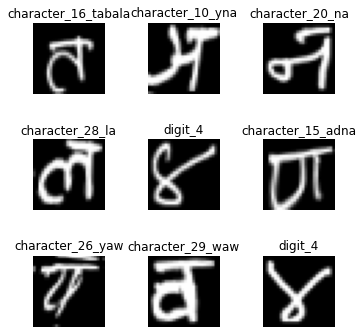

In [60]:
data.show_batch(rows=3, figsize=(5,5))

In [62]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [64]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.969253,1.322125,0.620000,03:06
1,0.972196,0.506685,0.843406,03:07
2,0.659574,0.313335,0.905435,03:04
3,0.582230,0.287827,0.911812,03:05


In [0]:
learn.save('stage-1')

In [66]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

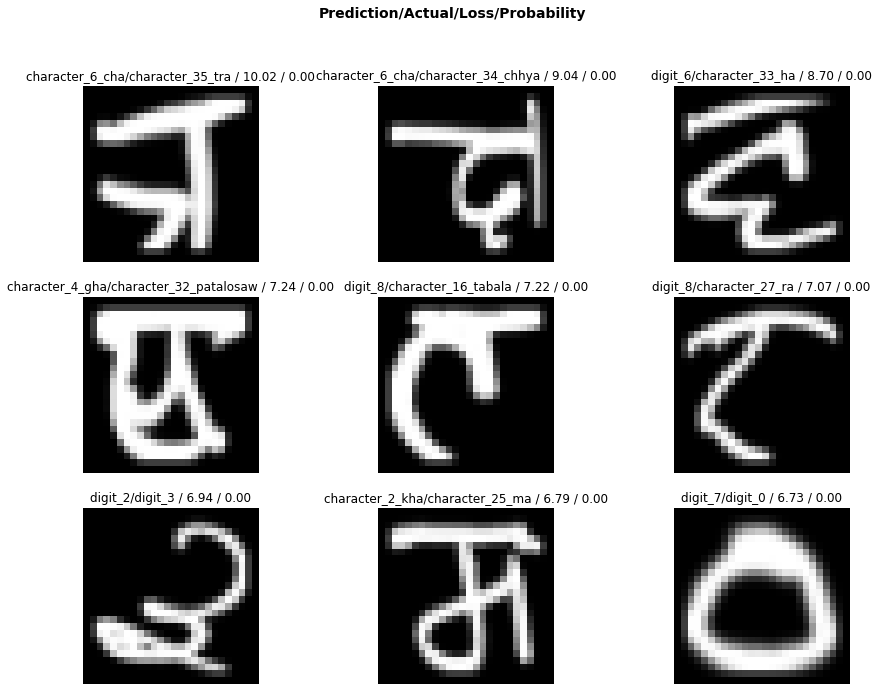

In [67]:
interp.plot_top_losses(9, figsize=(15,11))

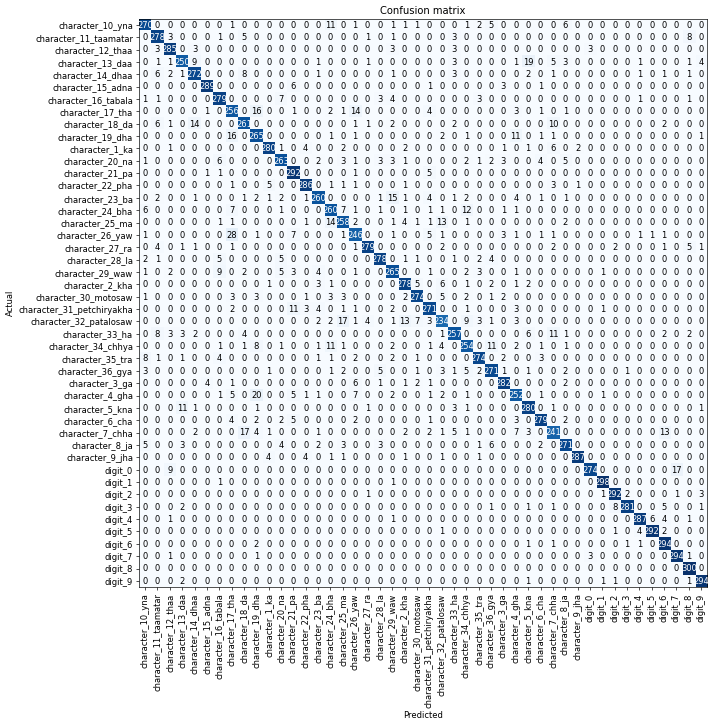

In [68]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [69]:
interp.most_confused(min_val=2)

[('character_26_yaw', 'character_17_tha', 28),
 ('character_4_gha', 'character_19_dha', 20),
 ('character_13_daa', 'character_5_kna', 19),
 ('character_32_patalosaw', 'character_25_ma', 17),
 ('character_7_chha', 'character_18_da', 17),
 ('digit_0', 'digit_7', 17),
 ('character_17_tha', 'character_19_dha', 16),
 ('character_19_dha', 'character_17_tha', 16),
 ('character_23_ba', 'character_29_waw', 15),
 ('character_17_tha', 'character_26_yaw', 14),
 ('character_18_da', 'character_14_dhaa', 14),
 ('character_25_ma', 'character_24_bha', 14),
 ('character_25_ma', 'character_32_patalosaw', 13),
 ('character_32_patalosaw', 'character_2_kha', 13),
 ('character_7_chha', 'digit_6', 13),
 ('character_24_bha', 'character_34_chhya', 12),
 ('character_10_yna', 'character_24_bha', 11),
 ('character_19_dha', 'character_4_gha', 11),
 ('character_31_petchiryakha', 'character_21_pa', 11),
 ('character_33_ha', 'character_7_chha', 11),
 ('character_34_chhya', 'character_24_bha', 11),
 ('character_34_chhy

In [0]:
learn.unfreeze()

In [71]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.101937,0.049221,0.984928,03:20


In [0]:
learn.load('stage-1');

In [74]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


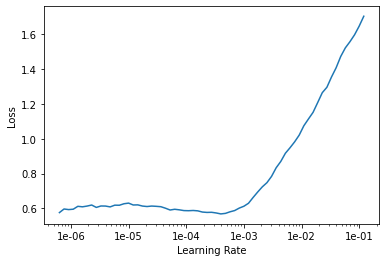

In [75]:
learn.recorder.plot()

In [77]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.247026,0.102981,0.968188,03:20
1,0.170227,0.074576,0.976232,03:18


In [0]:
learn.save('stage-2')